# Modellierung dynamischer Systeme

![feder-masse](images/MassSpring-5864.gif)

### Beschreibung eines dynamischen Systems mit Hilfe von Differential Gleichungen

Ein Masse-Feder System ist ein einfaches Beispiel eines dynamischen Systems. Es bestehend aus einer Feder und einer Masse.

![FIG](images/spring-mass.png)


Das System verhält sich entsprechend dem [Hookeschen Gesetz](https://de.wikipedia.org/wiki/Hookesches_Gesetz) Gesetz elastisch. Das heisst, die Ausdehnung der Feder ist direkt proportional (linear) zu der angehängten Masse.


\begin{equation}
F = -k \cdot x
\end{equation}

Das System kann durch eine Variable, der Position $x$ beschrieben werden. Die Position $x$ entspricht dem Ort, an welchem die Masse $m$ zu einem Zeitpunkt $t$ hängt. 



Bewegt sich die Masse sprechen wir von einem dynamischen System. Die Veränderung der Variablen $x$ kann durch $\dot{x}$ beschrieben werden, also der Geschwindigkeit mit welcher sich die Masse zu einem bestimmten Zeitpunkt bewegt.


Das [2. Newtonsche Gestz](https://de.wikipedia.org/wiki/Newtonsche_Gesetze) lautet:

$$F_{tot} = m \cdot a$$



Es beschreibt die Dynamik eines Systems und kann als Ausgangspunkt genutzt werden umd die Bewegungsgleichungen zu erhalten. Die [klassische Mechanik](https://de.wikipedia.org/wiki/Klassische_Mechanik) ist ein Teilgebiet der Physik, in welcher dieses Vorgehen beschrieben wird.

Die Beschleunigung $a$ lässt sich auch durch die zweite Ableitung des Ortes beschreiben.

also:

$$F_{tot} = m \cdot \ddot{x}$$

Auf das Feder-Masse System wirken zwei Kräfte

\begin{equation}
m \cdot \ddot{x} = -k \cdot x + m \cdot g 
\end{equation}

\begin{equation}
\ddot{x} = \frac{-kx}{m} + g
\end{equation}

Bei dieser Gleichung handelt es sich um eine Differntialgleichung 2. Ordnung

Rein mathematisch lässt sich eine Differentialgleichung nur manchmal lösen.

Mit einer Simulation kann das Verhalten des Systems numerisch modelliert werden.

Indem zu jedem Zeitpunkt die Beschleunigung und die Postion der Masse berechnet wird.

### Integration der Differentialgleichung

Die folgende Python Funktion berechnet den Ort und Geschwindigkeit nach einem Zeitschritt $\Delta t$.

In [3]:
def MassSpring(state,t):
  # unpack the state vector
  x = state[0]
  xd = state[1]

  # these are our constants
  k = 6.5 # Newtons per metre
  m = 3.5 # Kilograms
  g = 9.8 # metres per second
  # b = 2.0 # damping

  # compute acceleration xdd
  xdd = ((-k*x)/m) + g #+ (-b*xd)/m

  # return the two state derivatives
  return [xd, xdd]


Ablauf der Simulation

1. Festlegung des Orts und der Startgeschwindigkeit
2. Zeitbereich für die Simulation in einem Feld speichern 

Die Simulation beginnt zum Zeitpunkt $t_0$

- Berechung der Beschleunigung $\ddot{x}$ aus Anfangszustand $x(t=0),\dot{x}(t=0)$
- Abschätzung der neuen Postion $x$ und Geschwindigkeit $\dot{x}$ zur Zeit $t = 0+\Delta t$
- Berechnung der Beschleunigung $\ddot{x}(0+\Delta t)$ aus $x(t=0+\Delta t),\dot{x}(t=0+\Delta t)$
- Abschätzung der neuen Position $x(t=0+2 \cdot \Delta t)$ und Geschwindigkeit $\dot{x}(t=0+2 \cdot \Delta t)$ 
- Berechnung der Beschleunigung $\ddot{x}(t = 0+2 \cdot \Delta t)$
- usw.


Populating the interactive namespace from numpy and matplotlib


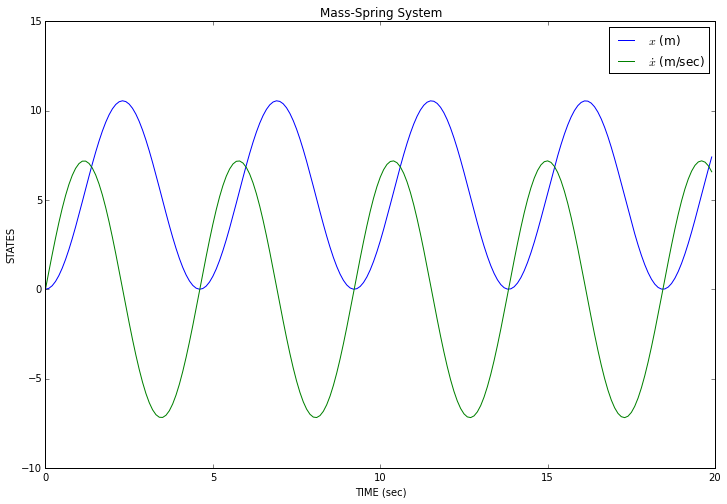

In [4]:
%pylab inline

from scipy.integrate import odeint

state0 = [0, 0.0]
t = arange(0.0, 20.0, 0.1)

state = odeint(MassSpring, state0, t)

fig = figure(figsize=(12,8))
plot(t, state)
xlabel('TIME (sec)')
ylabel('STATES')
title('Mass-Spring System')
legend(('$x$ (m)', '$\dot{x}$ (m/sec)'))

### Aufgaben - Tasks

- Was bewirkt eine Veränderung der Federkonstante?
- Schwingt ein Federmasse System auf dem Mond langsamer oder schneller?
- Mit welcher Frequenz schwingt das System?
- In welche Richtung schaut die x-Achse?
- In der Natur unterliegen viele Systeme einer [Dämpfung](https://de.wikipedia.org/wiki/D%C3%A4mpfung). Ein solche Dämpfung kann eine Kraft erzeugen, welche proportional zur Geschwindigkeit ist. z.B. $F = -b \cdot \dot{x}$
- Wie sieht eine gdämpfte Bewegung aus?
- Erstellen Sie ein [Phasendiagramm](images/anim1-5998.mp4) eines gedämpften Systmes (x: Position, y: Geschwindigkeit)


# Lorenz System - Flügelschlag des Schmetterlings

Ein Lorenz system ist eine Vereinfachung atomsphärischer Konvektionsströmung. Das System beinhaltet 3 gekoppelte Differentialgleichungen. Die Zustandsvariable besteht aus $x,y,z$


\begin{eqnarray}
\dot{x} &= &\sigma(y-x)\\
\dot{y} &= &(\rho-z)x - y\\
\dot{z} &= &xy-\beta z
\end{eqnarray}

Die drei Parameter $\sigma,\rho,\beta$ characterizieren das
chaotische Verhalten.

Wählen wir diese wie folgt:

\begin{eqnarray}
\sigma &= &10\\
\rho &= &28\\
\beta &= &\frac{8}{3}
\end{eqnarray}


Analog zum Masse-Feder System können einzelne Zeitschritte berechnet werden.

### Aufgaben - Tasks

- Führen Sie den folgenden Programmblock mit CTRL + Enter aus
- Variieren Sie den Parameter rho. Benutzen Sie die folgendne Werte 2, 4, 8, 16, 24, 30 und 32. Wie verhält sich das System ?
- Variieren Sie den Parameter sigma. Benutzen Sie die folgendne Werte 2, 4, 16, 30 und 62. Wie verhält sich das System ?
- Was bewirkt der Parameter beta?



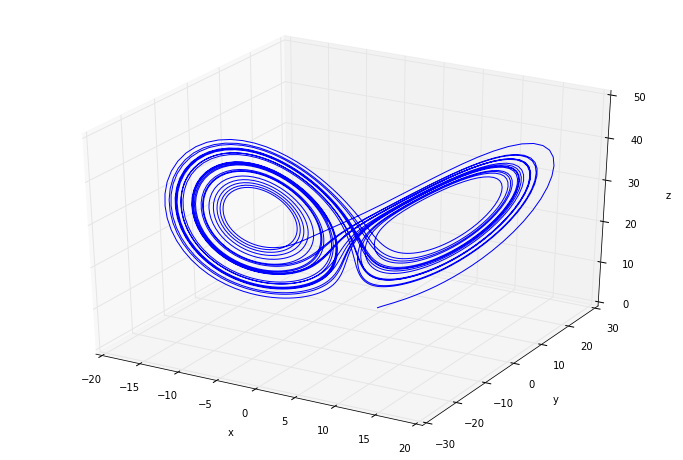

In [32]:
from scipy.integrate import odeint

def Lorenz(state,t):
  # unpack the state vector
  x = state[0]
  y = state[1]
  z = state[2]

  # these are our constants
  sigma = 8.0
  rho = 28 
  beta = 8.0/3 

  # compute state derivatives
  xd = sigma * (y-x)
  yd = (rho-z)*x - y
  zd = x*y - beta*z

  # return the state derivatives
  return [xd, yd, zd]

state0 = [2.3, 3.0, 4.0]
t = arange(0.0, 30.0, 0.01)

state = odeint(Lorenz, state0, t)

# do some fancy 3D plotting
from mpl_toolkits.mplot3d import Axes3D
fig = figure(figsize=(12,8))
ax = fig.gca(projection='3d')
ax.plot(state[:,0],state[:,1],state[:,2])
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
show()

### Aufgaben - Tasks

- Untersuchen Sie verschiedene Startwerte
- Nach wie vielen Zeitschritten driften die simulierten Werte ausseinader?
- Verändern Sie den Parameter i um das Ausseinanderdriften zu untersuchen. 

distance = 7.943473 for a 0.000100 different in initial condition


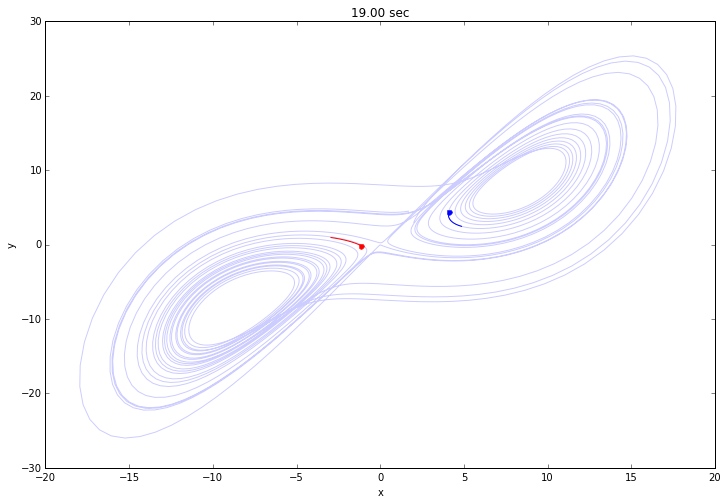

In [33]:
t = arange(0.0, 30, 0.01)

# original initial conditions
state1_0 = [2.0, 3.0, 4.0]
state1 = odeint(Lorenz, state1_0, t)

# rerun with very small change in initial conditions
delta = 0.0001
state2_0 = [2.0+delta, 3.0, 4.0]
state2 = odeint(Lorenz, state2_0, t)

# animation
figure(figsize=(12,8))
pb = plot(state1[:,0],state1[:,1],'b-',alpha=0.2)
xlabel('x')
ylabel('y')

i = 1900          # the two simulations really diverge here!

p = plot(state1[i:i+10,0],state1[i:i+10,1],'b-')
pp = plot(state1[i+10,0],state1[i+10,1],'b.',markersize=10)
p2 = plot(state2[i:i+10,0],state2[i:i+10,1],'r-')
pp2 = plot(state2[i+10,0],state2[i+10,1],'r.',markersize=10)
tt = title("%4.2f sec" % (1.0*i/100))

s1 = state1[i,:]
s2 = state2[i,:]
d12 = norm(s1-s2) # distance
print ("distance = %f for a %f different in initial condition") % (d12, delta)